##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## **Introduction to Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab where you will get a quick introduction to the Python programming language and the environment used for the course's exercises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.

For example, to print "Hello World", just hover the mouse over [ ] and press the play button to the upper left. Or press shift-enter to execute.

In [6]:
import torch
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data = datasets.MNIST(root = 'data',
train = True,
transform = ToTensor(),
download = True,
)
test_data = datasets.MNIST(
root = 'data',
train = False,
transform = ToTensor()
)

print(train_data)


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


## Functions, Conditionals, and Iteration
Let's create a Python function, and call it from a loop.

In [13]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

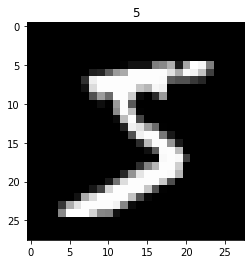

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

Easy, right?

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

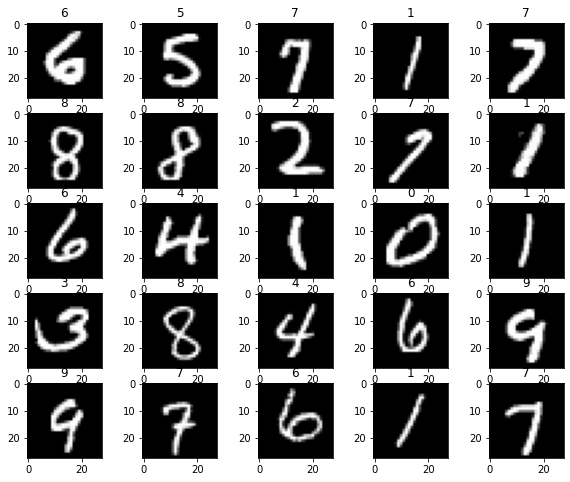

In [14]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [15]:
from torch.utils.data import DataLoader
loaders = {
'train' : torch.utils.data.DataLoader(train_data,
batch_size=100,
shuffle=True,
num_workers=1),
'test' : torch.utils.data.DataLoader(test_data,
batch_size=100,
shuffle=True,
num_workers=1),
}

## Numpy and lists
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

In [21]:
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
    nn.Conv2d(
    in_channels=1,
    out_channels=16,
    kernel_size=5,
    stride=1,
    padding=2,
    ),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = nn.Sequential(
    nn.Conv2d(16, 32, 5, 1, 2),
    nn.ReLU(),
    nn.MaxPool2d(2),
    )
# fully connected layer, output 10 classes
    self.out = nn.Linear(32 * 7 * 7, 10)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    output = self.out(x)
    return output, x # return x for visualization





In [22]:
cnn = CNN()
print(cnn)


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [28]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [30]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [31]:
from torch.autograd import Variable
num_epochs = 10

def train(num_epochs, cnn, loaders):
    cnn.train()
    # Train the model
    total_step = len(loaders['train'])
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images) # batch x
            b_y = Variable(labels) # batch y

            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()

            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
        pass
    pass
  
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.2031
Epoch [1/10], Step [200/600], Loss: 0.1359
Epoch [1/10], Step [300/600], Loss: 0.0204
Epoch [1/10], Step [400/600], Loss: 0.0729
Epoch [1/10], Step [500/600], Loss: 0.1021
Epoch [1/10], Step [600/600], Loss: 0.0863
Epoch [2/10], Step [100/600], Loss: 0.0798
Epoch [2/10], Step [200/600], Loss: 0.1236
Epoch [2/10], Step [300/600], Loss: 0.1288
Epoch [2/10], Step [400/600], Loss: 0.0087
Epoch [2/10], Step [500/600], Loss: 0.1264
Epoch [2/10], Step [600/600], Loss: 0.0235
Epoch [3/10], Step [100/600], Loss: 0.1563
Epoch [3/10], Step [200/600], Loss: 0.1059
Epoch [3/10], Step [300/600], Loss: 0.0440
Epoch [3/10], Step [400/600], Loss: 0.0432
Epoch [3/10], Step [500/600], Loss: 0.0433
Epoch [3/10], Step [600/600], Loss: 0.0556
Epoch [4/10], Step [100/600], Loss: 0.0489
Epoch [4/10], Step [200/600], Loss: 0.0575
Epoch [4/10], Step [300/600], Loss: 0.1544
Epoch [4/10], Step [400/600], Loss: 0.0327
Epoch [4/10], Step [500/600], Loss: 0.0103
Epoch [4/10

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).


**Exercise**

Create a code cell underneath this text cell and add code to:


*   List the path of the current directory (pwd)
* Go to / (cd) and list the content (ls -l)

In [33]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

test()

#Explanation
'''The code defines a function called test(). Inside the function, the first line sets the model (cnn) to evaluation mode, which disables certain features such as dropout and batch 
normalization that are useful during training but not during testing. The next line is a context manager that disables gradient computation during the block of code that follows. This is 
useful because it can save memory and computation time. Inside the context manager, the code initializes two variables correct and total to 0. 

These variables are not used in this code snippet, so they can be removed. Then, the code enters a for loop that iterates over the test set, which is represented by the variable loaders['test']. For each iteration of the loop, the 
code passes the current image and label (images and labels) through the CNN model (cnn) and assigns the output to the variable test_output. 

The variable last_layer is assigned the output from the last layer of the model. The variable pred_y is then set to the predicted label of the image, which is obtained by taking the index of the maximum element in the test_output tensor 
along dimension 1 and squeezing the resulting tensor to remove single-dimensional entries. 

The variable accuracy is then calculated as the proportion of correctly predicted labels to the total number of images in the batch. Finally, the code prints the accuracy of the model on the test set. It's worth noting that, since the loop is iterating over the test set, this 
statement will print the accuracy for each batch of the test set, not the final accuracy over the entire test set.'''

Test Accuracy of the model on the 10000 test images: 0.99


All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)


In [35]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

actual_number = lbls[:10].numpy()
actual_number


array([3, 6, 4, 3, 9, 2, 8, 9, 8, 1])

In [36]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [3 6 4 3 9 2 8 9 8 1]
Actual number: [3 6 4 3 9 2 8 9 8 1]
